In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

## Introduction
- `Definition`: Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often with visual methods.
- `Objective`: EDA helps in understanding the data, detecting patterns, spotting anomalies, and checking assumptions.

## Steps in EDA
- Data Collection
- Data Cleaning
- Data Transformation
- Data Visualization
- Feature Engineering
- Statistical Analysis
- Correlation Analysis

# Steps with Code
## Data Collection
- Collect the dataset. For demonstration, we'll use the famous Titanic dataset.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


##  Data Cleaning
- Handle Missing Values
- Remove Duplicates
- Fix Structural Errors

In [3]:
# Checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)

In [5]:
# Removing duplicates
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Data Transformation
- Convert categorical variables into numerical
- Normalization/Scaling

In [6]:
# Converting categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [7]:
# Normalization
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [9]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445           0           1  
1      0          PC 17599  0.786845           0           0  
2      0  STON/O2. 3101282 -0.488854           0           1  
3      0            113803  0.420730           0           1  

## Data Visualization
- Histograms
- Box Plots
- Scatter Plots
- Correlation Heatmap

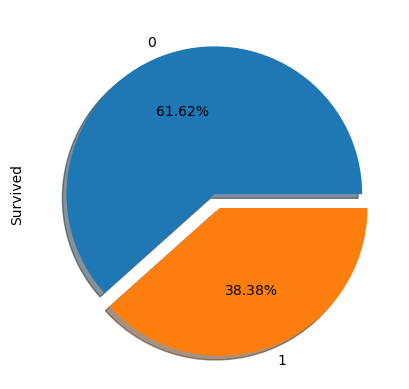

In [10]:
df.Survived.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0,0.1])
plt.show()

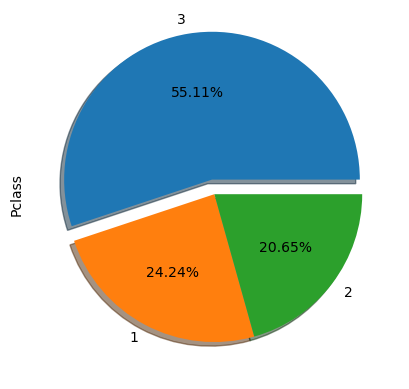

In [11]:
df.Pclass.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0.1,0,0])
plt.show()

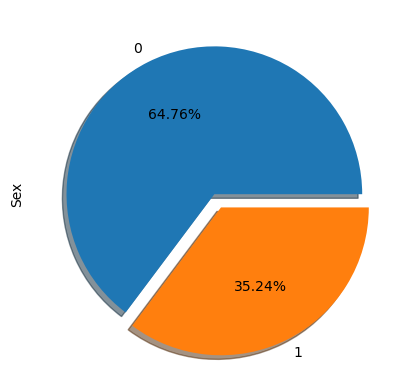

In [12]:
df.Sex.value_counts().plot(kind = 'pie', autopct="%0.2f%%", shadow=True, explode=[0,0.1])
plt.show()

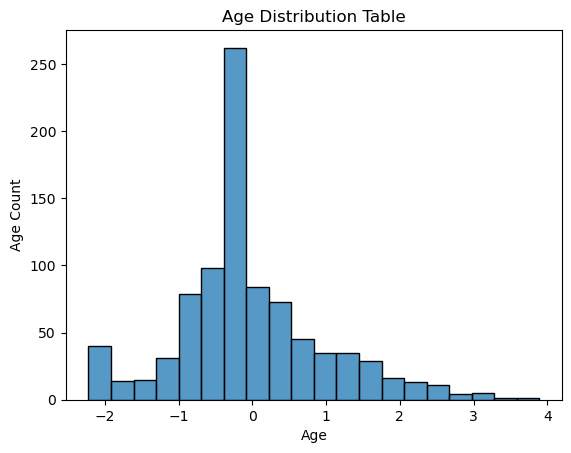

In [13]:
sns.histplot(x=df['Age'],bins=20)
plt.title("Age Distribution Table")
plt.xlabel("Age")
plt.ylabel('Age Count')
plt.show()

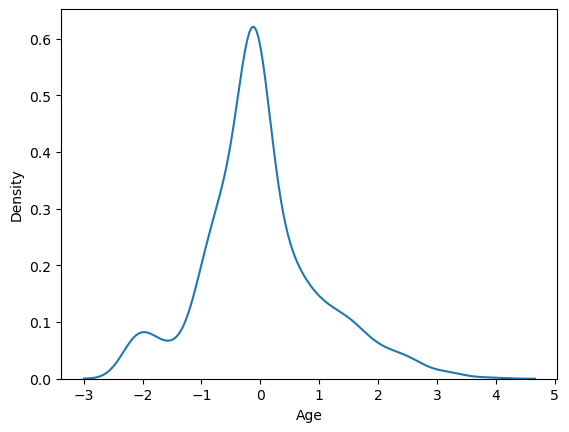

In [14]:
sns.distplot(df['Age'], hist=False)
plt.show()

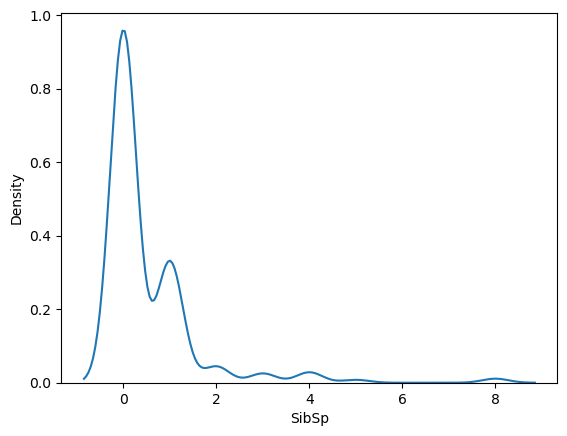

In [15]:
sns.distplot(df['SibSp'], hist=False)
plt.show()

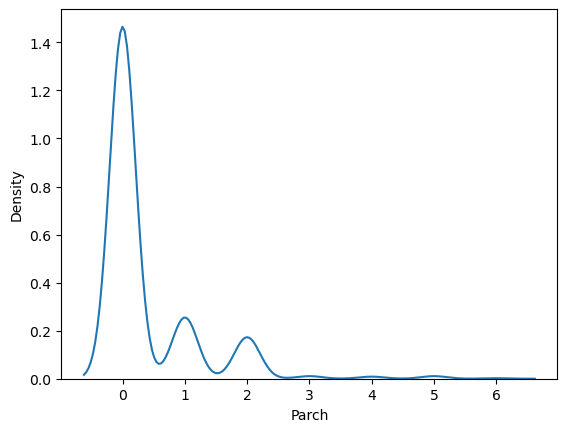

In [16]:
sns.distplot(df['Parch'], hist=False)
plt.show()

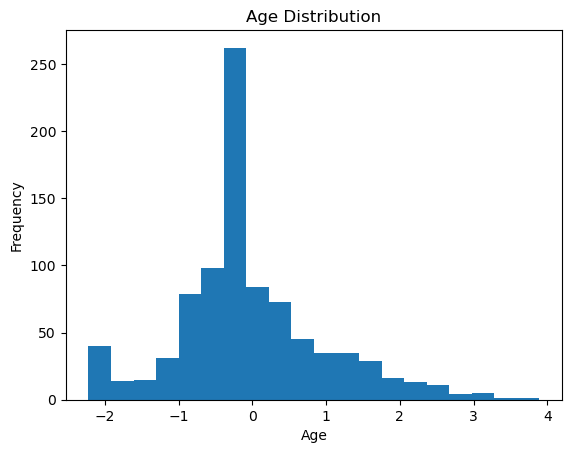

In [17]:
# Histograms
df['Age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


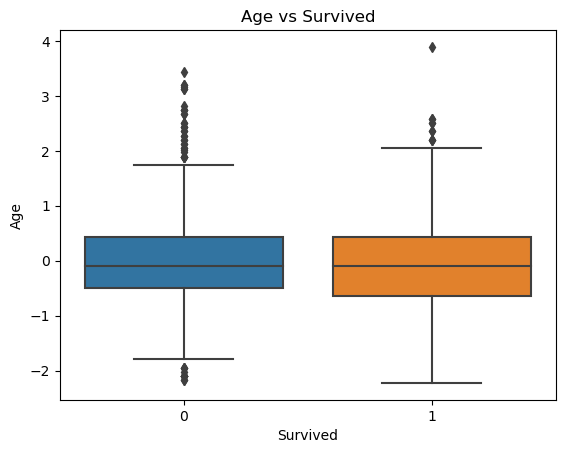

In [18]:
# Box Plots
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()


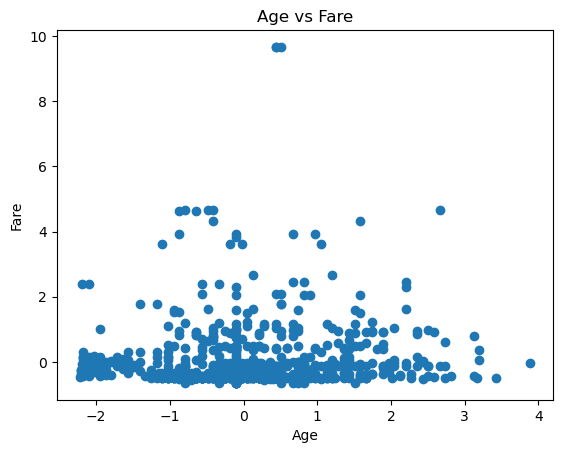

In [19]:
# Scatter Plots
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [20]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.221009,0.074053
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.074115,-0.119224
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031415,-0.006729
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.117216,-0.162184
Embarked_Q,-0.033606,0.003650,0.221009,0.074115,-0.031415,-0.026354,-0.081228,-0.117216,1.000000,-0.499421
Embarked_S,0.022204,-0.149683,0.074053,-0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.499421,1.000000


<Axes: >

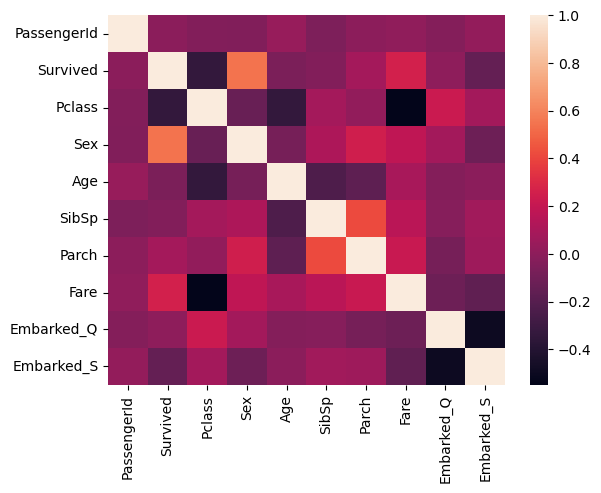

In [21]:
sns.heatmap(df.corr())

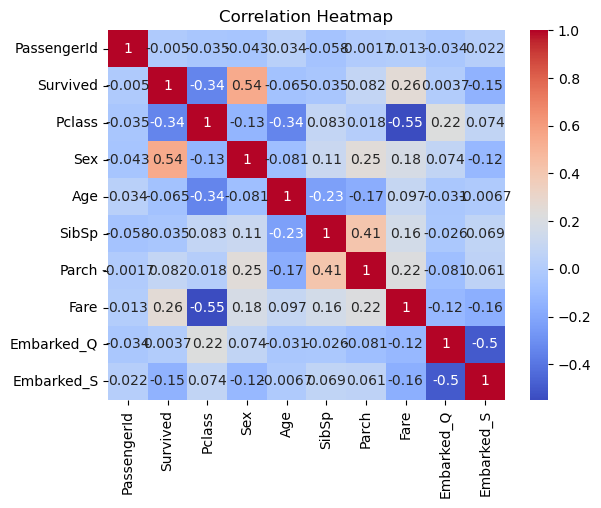

In [22]:
 # Dropping non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering
- Creating new features
- Feature selection

In [23]:
# Creating a new feature 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [24]:

# Dropping less important features
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [25]:
print(df.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445           0   
1         1       1    1  0.663861      1      0  0.786845           0   
2         1       3    1 -0.258337      0      0 -0.488854           0   
3         1       1    1  0.433312      1      0  0.420730           0   
4         0       3    0  0.433312      0      0 -0.486337           0   

   Embarked_S  Family_Size  
0           1            2  
1           0            2  
2           1            1  
3           1            2  
4           1            1  


##  Statistical Analysis
- Summary Statistics
- Group By Analysis

In [26]:
# Summary Statistics
print(df.describe())

         Survived      Pclass         Sex           Age       SibSp  \
count  891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean     0.383838    2.308642    0.352413  2.272780e-16    0.523008   
std      0.486592    0.836071    0.477990  1.000562e+00    1.102743   
min      0.000000    1.000000    0.000000 -2.224156e+00    0.000000   
25%      0.000000    2.000000    0.000000 -5.657365e-01    0.000000   
50%      0.000000    3.000000    0.000000 -1.046374e-01    0.000000   
75%      1.000000    3.000000    1.000000  4.333115e-01    1.000000   
max      1.000000    3.000000    1.000000  3.891554e+00    8.000000   

            Parch          Fare  Embarked_Q  Embarked_S  Family_Size  
count  891.000000  8.910000e+02  891.000000  891.000000   891.000000  
mean     0.381594  3.987333e-18    0.086420    0.725028     1.904602  
std      0.806057  1.000562e+00    0.281141    0.446751     1.613459  
min      0.000000 -6.484217e-01    0.000000    0.000000     1.000000  
25%  

In [27]:
# Group By Analysis
print(df.groupby('Survived').mean())

            Pclass       Sex       Age     SibSp     Parch      Fare  \
Survived                                                               
0         2.531876  0.147541  0.051232  0.553734  0.329690 -0.203085   
1         1.950292  0.681287 -0.082241  0.473684  0.464912  0.326005   

          Embarked_Q  Embarked_S  Family_Size  
Survived                                       
0           0.085610    0.777778     1.883424  
1           0.087719    0.640351     1.938596  


## Correlation Analysis
- Understanding relationships between features

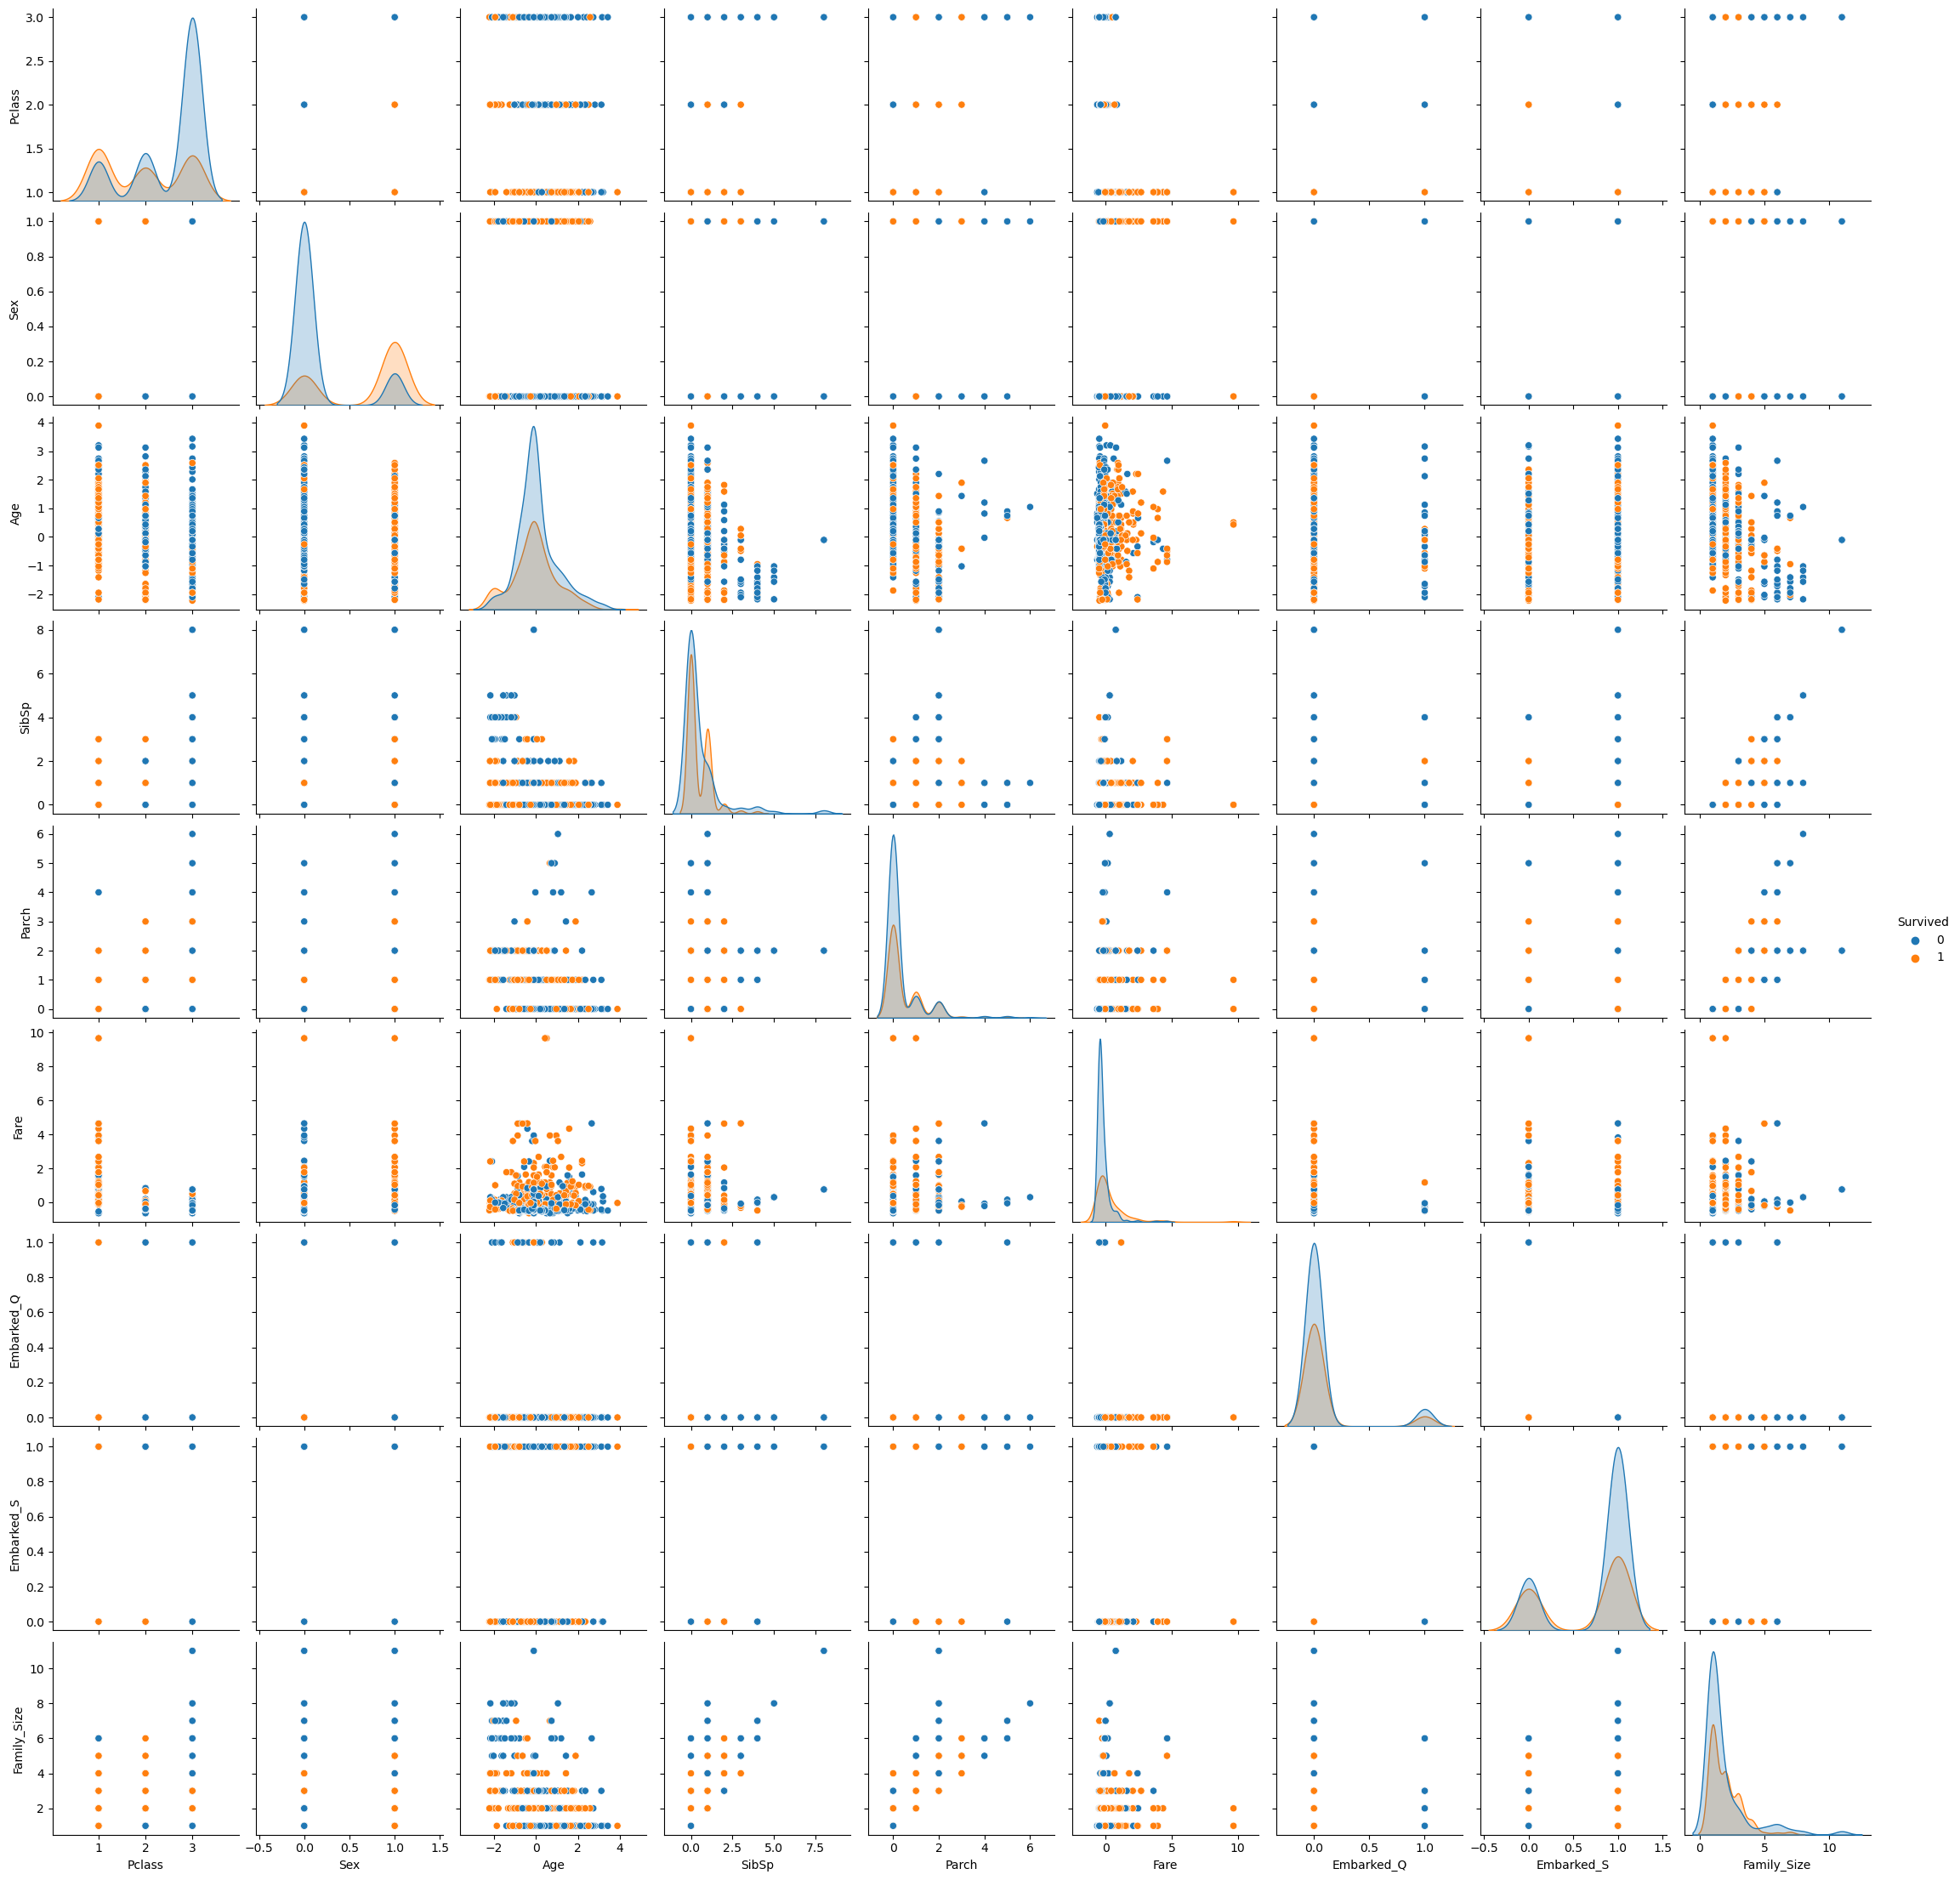

In [28]:
# Correlation Analysis
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()


## Conclusion
- EDA is a crucial step in the data analysis process.
- It helps in understanding the underlying patterns and relationships in the data.
- Provides a solid foundation for further modeling and analysis.

<div style="text-align: center; padding: 20px; font-family: Arial, sans-serif;">
    <h2 style="color: #ff7f0e;">Thank You!</h2>
    <p style="font-size: 16px; color: #4CAF50;">
        <span style="color: #4CAF50;">Thank you for exploring this EDA notebook.</span> 
        I hope you found the insights and techniques valuable.
    </p>
</div>
